# Comparación de Modelos de Pronóstico

En este notebook se realiza una comparación exhaustiva de todos los modelos implementados para determinar cuál es el mejor modelo para realizar las predicciones del próximo mes para los productos 1 y 2.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Configuración para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## 1. Carga de Datos


In [2]:
# Cargar datos históricos
df = pd.read_csv('data-set.csv', index_col=0)
df.index = df.index.astype(int)

print("Datos cargados:")
print(f"Forma del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head())
print(f"\nÚltimas filas:")
print(df.tail())
print(f"\nEstadísticas descriptivas:")
print(df.describe())


Datos cargados:
Forma del dataset: (127, 2)

Primeras filas:
    producto1   producto2
1  500.000000  200.000000
2  497.400893  210.686220
3  478.605317  222.018584
4  486.454125  233.920990
5  479.695678  238.402098

Últimas filas:
      producto1   producto2
123  164.610771  629.293034
124  150.881839  637.099467
125  151.788470  653.155282
126  137.047639  672.528345
127  141.990873  676.058092

Estadísticas descriptivas:
        producto1   producto2
count  127.000000  127.000000
mean   343.571660  581.037664
std    100.234821  167.504363
min    137.047639  200.000000
25%    256.853812  469.194001
50%    340.644019  626.048401
75%    450.071775  708.941718
max    500.000000  806.440615


## 2. Compilación de Resultados de los Modelos

A continuación se compilan todos los resultados obtenidos de cada modelo según el archivo de resultados finales.


In [3]:
# Obtener valores reales del último período
ultimo_valor_p1 = df['producto1'].iloc[-1]
ultimo_valor_p2 = df['producto2'].iloc[-1]

# Compilar resultados de todos los modelos
resultados = {
    'SMA': {
        'producto1': {'RMSE': 20.3711, 'MAE': 17.0308, 'prediccion': 149.2639},
        'producto2': {'RMSE': 27.5841, 'MAE': 23.3543, 'prediccion': 653.6268}
    },
    'WMA': {
        'producto1': {'RMSE': 16.3214, 'MAE': 13.5918, 'prediccion': 145.3257},
        'producto2': {'RMSE': 22.4406, 'MAE': 19.0951, 'prediccion': 662.2241}
    },
    'SES': {
        'producto1': {'RMSE': 7.8887, 'MAE': None, 'prediccion': 141.9381},
        'producto2': {'RMSE': 13.8363, 'MAE': None, 'prediccion': 675.3278}
    },
    'Holt-DES': {
        'producto1': {'RMSE': 6.3428, 'MAE': None, 'prediccion': 132.3972},
        'producto2': {'RMSE': 11.2942, 'MAE': None, 'prediccion': 692.2846}
    },
    'Holt-Winters-TES': {
        'producto1': {'RMSE': 7.2654, 'MAE': None, 'prediccion': 139.0054},
        'producto2': {'RMSE': 12.7775, 'MAE': None, 'prediccion': 680.4668}
    },
    'ETS': {
        'producto1': {'RMSE': 6.6988, 'MAE': None, 'prediccion': 133.2129},
        'producto2': {'RMSE': 12.0211, 'MAE': None, 'prediccion': 692.1065}
    },
    'ARIMA': {
        'producto1': {'RMSE': 6.1141, 'MAE': None, 'prediccion': 133.4213},
        'producto2': {'RMSE': 9.1551, 'MAE': None, 'prediccion': 690.5958}
    },
    'Auto-ARIMA': {
        'producto1': {'RMSE': 2589.2507, 'MAE': None, 'prediccion': 128.8965},
        'producto2': {'RMSE': 6018.4468, 'MAE': None, 'prediccion': 691.3015}
    },
    'Prophet': {
        'producto1': {'RMSE': 7.2094, 'MAE': None, 'prediccion': 111.6571},
        'producto2': {'RMSE': 12.7925, 'MAE': None, 'prediccion': 583.1367}
    },
    'VAR': {
        'producto1': {'RMSE': 12.0380, 'MAE': None, 'prediccion': 128.1178},
        'producto2': {'RMSE': 12.0380, 'MAE': None, 'prediccion': 693.4125}
    }
}

print(f"Último valor observado - Producto 1: {ultimo_valor_p1:.4f}")
print(f"Último valor observado - Producto 2: {ultimo_valor_p2:.4f}")
print(f"\nTotal de modelos comparados: {len(resultados)}")


Último valor observado - Producto 1: 141.9909
Último valor observado - Producto 2: 676.0581

Total de modelos comparados: 10


## 3. Tabla Comparativa de Modelos


In [4]:
# Crear tabla comparativa
tabla_comparativa = []

for modelo, datos in resultados.items():
    p1 = datos['producto1']
    p2 = datos['producto2']
    
    # Calcular diferencia con último valor observado
    diff_p1 = p1['prediccion'] - ultimo_valor_p1
    diff_p2 = p2['prediccion'] - ultimo_valor_p2
    
    tabla_comparativa.append({
        'Modelo': modelo,
        'RMSE Producto 1': p1['RMSE'],
        'RMSE Producto 2': p2['RMSE'],
        'RMSE Promedio': (p1['RMSE'] + p2['RMSE']) / 2,
        'Predicción P1': p1['prediccion'],
        'Predicción P2': p2['prediccion'],
        'Diff P1': diff_p1,
        'Diff P2': diff_p2,
        'MAE P1': p1.get('MAE', np.nan),
        'MAE P2': p2.get('MAE', np.nan)
    })

df_comparacion = pd.DataFrame(tabla_comparativa)

# Ordenar por RMSE promedio (excluyendo Auto-ARIMA que tiene valores anómalos)
df_comparacion_ordenada = df_comparacion[df_comparacion['RMSE Promedio'] < 1000].copy()
df_comparacion_ordenada = df_comparacion_ordenada.sort_values('RMSE Promedio')

print("=" * 100)
print("TABLA COMPARATIVA DE MODELOS")
print("=" * 100)
print("\nTabla ordenada por RMSE Promedio (excluyendo modelos con RMSE > 1000):")
print(df_comparacion_ordenada.to_string(index=False))

print("\n\nTabla completa (incluyendo todos los modelos):")
print(df_comparacion.to_string(index=False))


TABLA COMPARATIVA DE MODELOS

Tabla ordenada por RMSE Promedio (excluyendo modelos con RMSE > 1000):
          Modelo  RMSE Producto 1  RMSE Producto 2  RMSE Promedio  Predicción P1  Predicción P2    Diff P1    Diff P2  MAE P1  MAE P2
           ARIMA           6.1141           9.1551        7.63460       133.4213       690.5958  -8.569573  14.537708     NaN     NaN
        Holt-DES           6.3428          11.2942        8.81850       132.3972       692.2846  -9.593673  16.226508     NaN     NaN
             ETS           6.6988          12.0211        9.35995       133.2129       692.1065  -8.777973  16.048408     NaN     NaN
         Prophet           7.2094          12.7925       10.00095       111.6571       583.1367 -30.333773 -92.921392     NaN     NaN
Holt-Winters-TES           7.2654          12.7775       10.02145       139.0054       680.4668  -2.985473   4.408708     NaN     NaN
             SES           7.8887          13.8363       10.86250       141.9381       675.3278

/var/folders/_x/d1k5bzvj68n2ycnt5gy4z0cr0000gn/T/ipykernel_12997/3579561073.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_comparacion_ordenada['Modelo'], rotation=45, ha='right')
/var/folders/_x/d1k5bzvj68n2ycnt5gy4z0cr0000gn/T/ipykernel_12997/3579561073.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(df_comparacion_ordenada['Modelo'], rotation=45, ha='right')


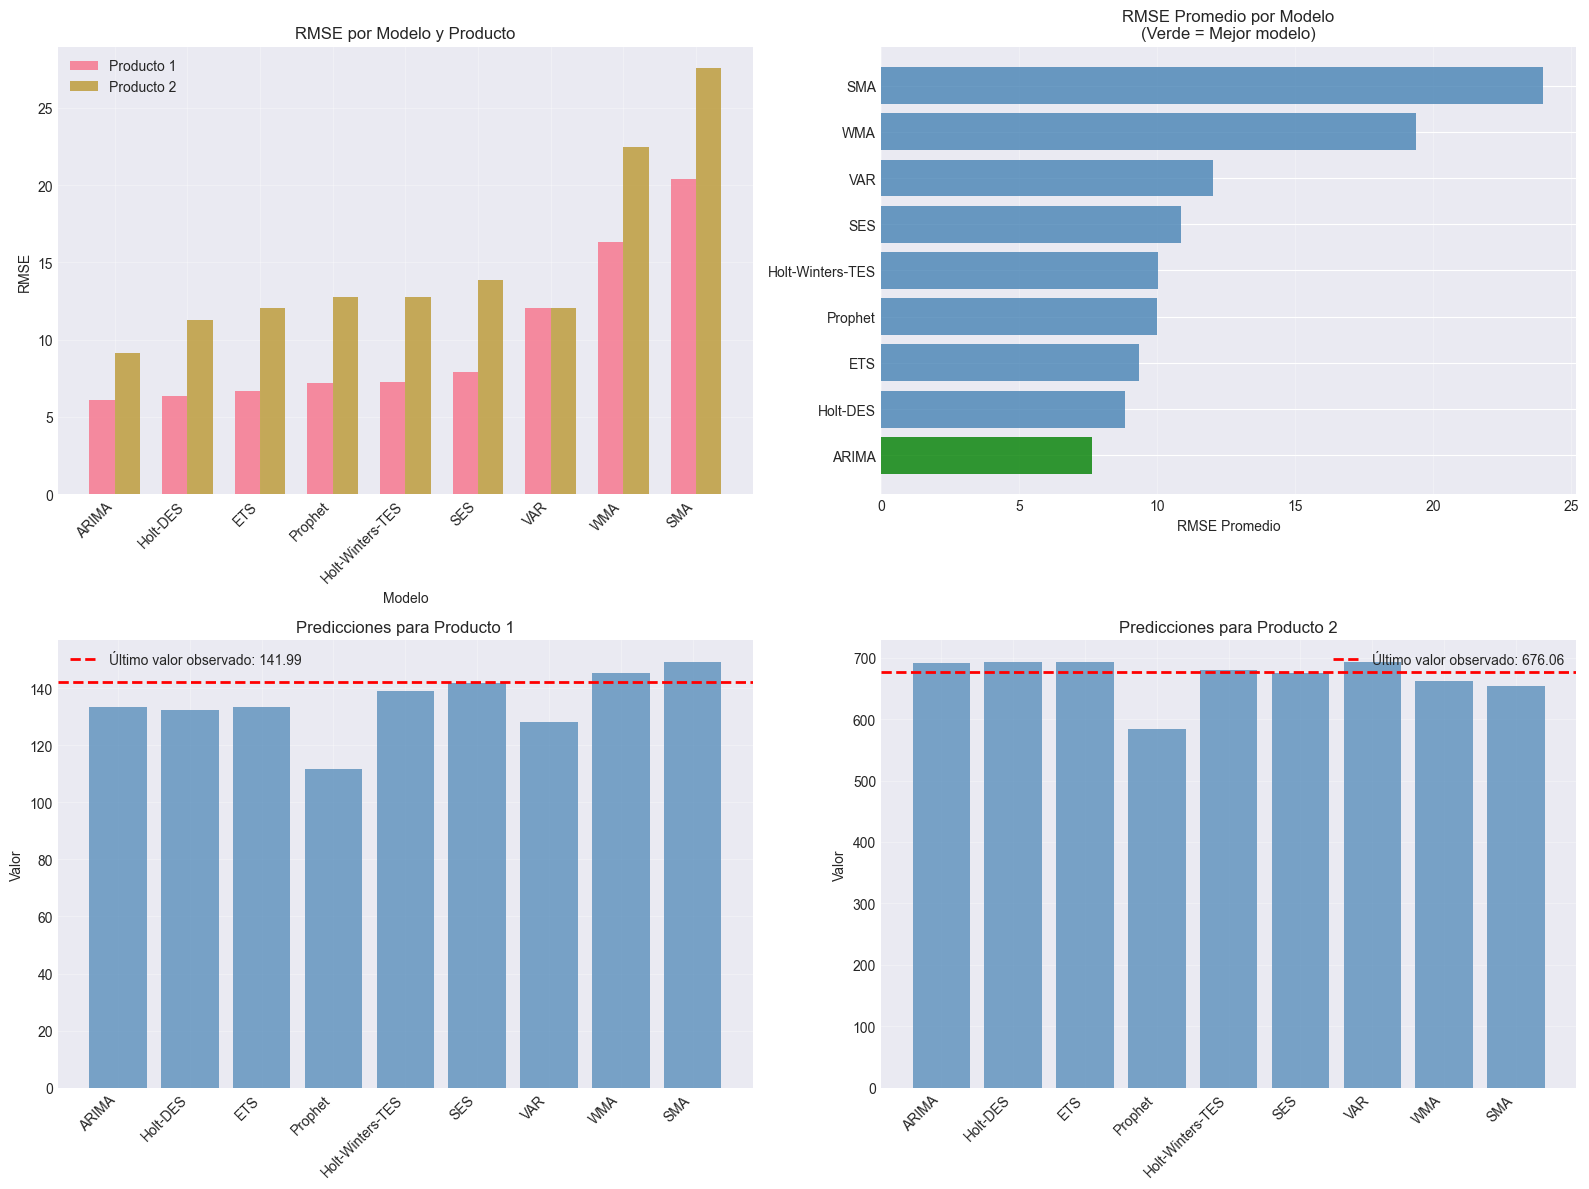

In [5]:
# Visualización de la tabla comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. RMSE por modelo y producto
ax1 = axes[0, 0]
x = np.arange(len(df_comparacion_ordenada))
width = 0.35
ax1.bar(x - width/2, df_comparacion_ordenada['RMSE Producto 1'], width, 
        label='Producto 1', alpha=0.8)
ax1.bar(x + width/2, df_comparacion_ordenada['RMSE Producto 2'], width, 
        label='Producto 2', alpha=0.8)
ax1.set_xlabel('Modelo')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE por Modelo y Producto')
ax1.set_xticks(x)
ax1.set_xticklabels(df_comparacion_ordenada['Modelo'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. RMSE Promedio
ax2 = axes[0, 1]
colors = ['green' if x == df_comparacion_ordenada['RMSE Promedio'].min() else 'steelblue' 
          for x in df_comparacion_ordenada['RMSE Promedio']]
ax2.barh(df_comparacion_ordenada['Modelo'], df_comparacion_ordenada['RMSE Promedio'], 
         color=colors, alpha=0.8)
ax2.set_xlabel('RMSE Promedio')
ax2.set_title('RMSE Promedio por Modelo\n(Verde = Mejor modelo)')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Predicciones Producto 1
ax3 = axes[1, 0]
ax3.axhline(y=ultimo_valor_p1, color='red', linestyle='--', linewidth=2, 
            label=f'Último valor observado: {ultimo_valor_p1:.2f}')
ax3.bar(df_comparacion_ordenada['Modelo'], df_comparacion_ordenada['Predicción P1'], 
        alpha=0.7, color='steelblue')
ax3.set_ylabel('Valor')
ax3.set_title('Predicciones para Producto 1')
ax3.set_xticklabels(df_comparacion_ordenada['Modelo'], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Predicciones Producto 2
ax4 = axes[1, 1]
ax4.axhline(y=ultimo_valor_p2, color='red', linestyle='--', linewidth=2, 
            label=f'Último valor observado: {ultimo_valor_p2:.2f}')
ax4.bar(df_comparacion_ordenada['Modelo'], df_comparacion_ordenada['Predicción P2'], 
        alpha=0.7, color='steelblue')
ax4.set_ylabel('Valor')
ax4.set_title('Predicciones para Producto 2')
ax4.set_xticklabels(df_comparacion_ordenada['Modelo'], rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Comparación de Predicciones con Series de Tiempo Históricas


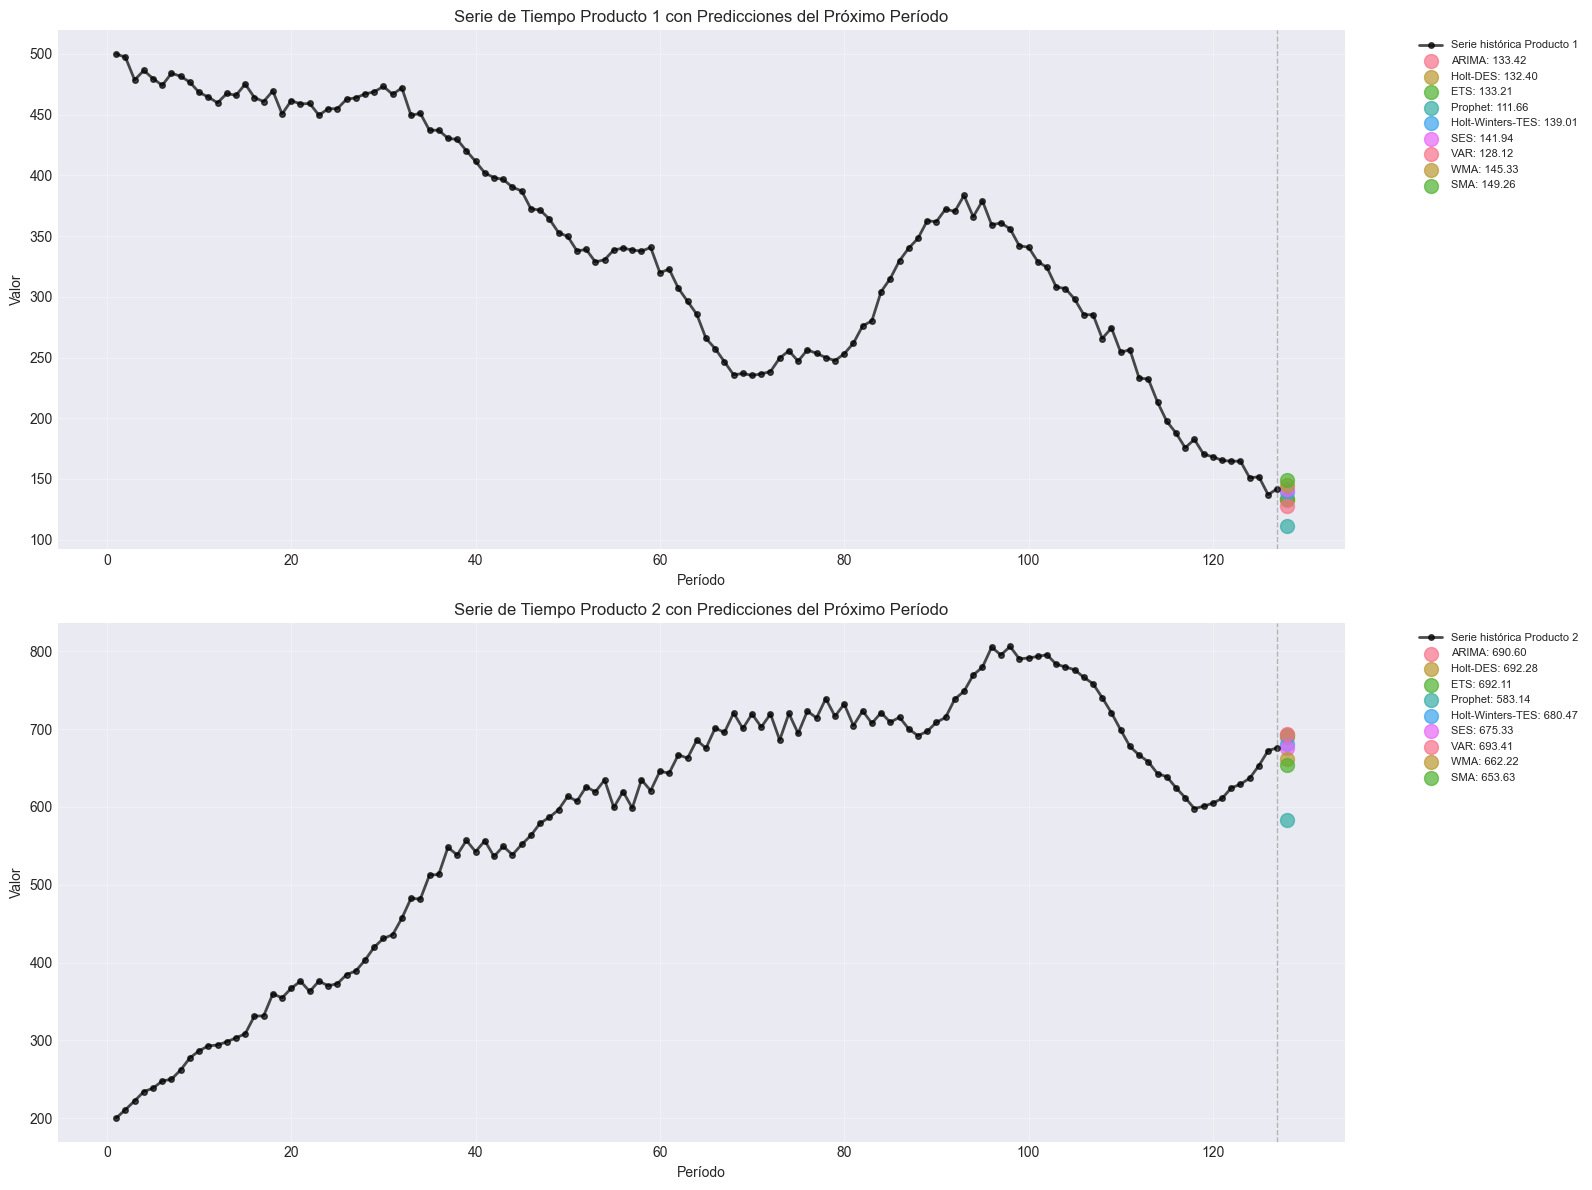

In [6]:
# Crear visualización de series de tiempo con predicciones
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Producto 1
ax1 = axes[0]
ax1.plot(df.index, df['producto1'], 'o-', linewidth=2, markersize=4, 
         label='Serie histórica Producto 1', color='black', alpha=0.7)

# Agregar predicciones
for modelo in df_comparacion_ordenada['Modelo']:
    pred = df_comparacion_ordenada[df_comparacion_ordenada['Modelo'] == modelo]['Predicción P1'].values[0]
    ax1.scatter([df.index.max() + 1], [pred], s=100, alpha=0.7, 
                label=f'{modelo}: {pred:.2f}')

ax1.axvline(x=df.index.max(), color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.set_xlabel('Período')
ax1.set_ylabel('Valor')
ax1.set_title('Serie de Tiempo Producto 1 con Predicciones del Próximo Período')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Producto 2
ax2 = axes[1]
ax2.plot(df.index, df['producto2'], 'o-', linewidth=2, markersize=4, 
         label='Serie histórica Producto 2', color='black', alpha=0.7)

# Agregar predicciones
for modelo in df_comparacion_ordenada['Modelo']:
    pred = df_comparacion_ordenada[df_comparacion_ordenada['Modelo'] == modelo]['Predicción P2'].values[0]
    ax2.scatter([df.index.max() + 1], [pred], s=100, alpha=0.7, 
                label=f'{modelo}: {pred:.2f}')

ax2.axvline(x=df.index.max(), color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax2.set_xlabel('Período')
ax2.set_ylabel('Valor')
ax2.set_title('Serie de Tiempo Producto 2 con Predicciones del Próximo Período')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


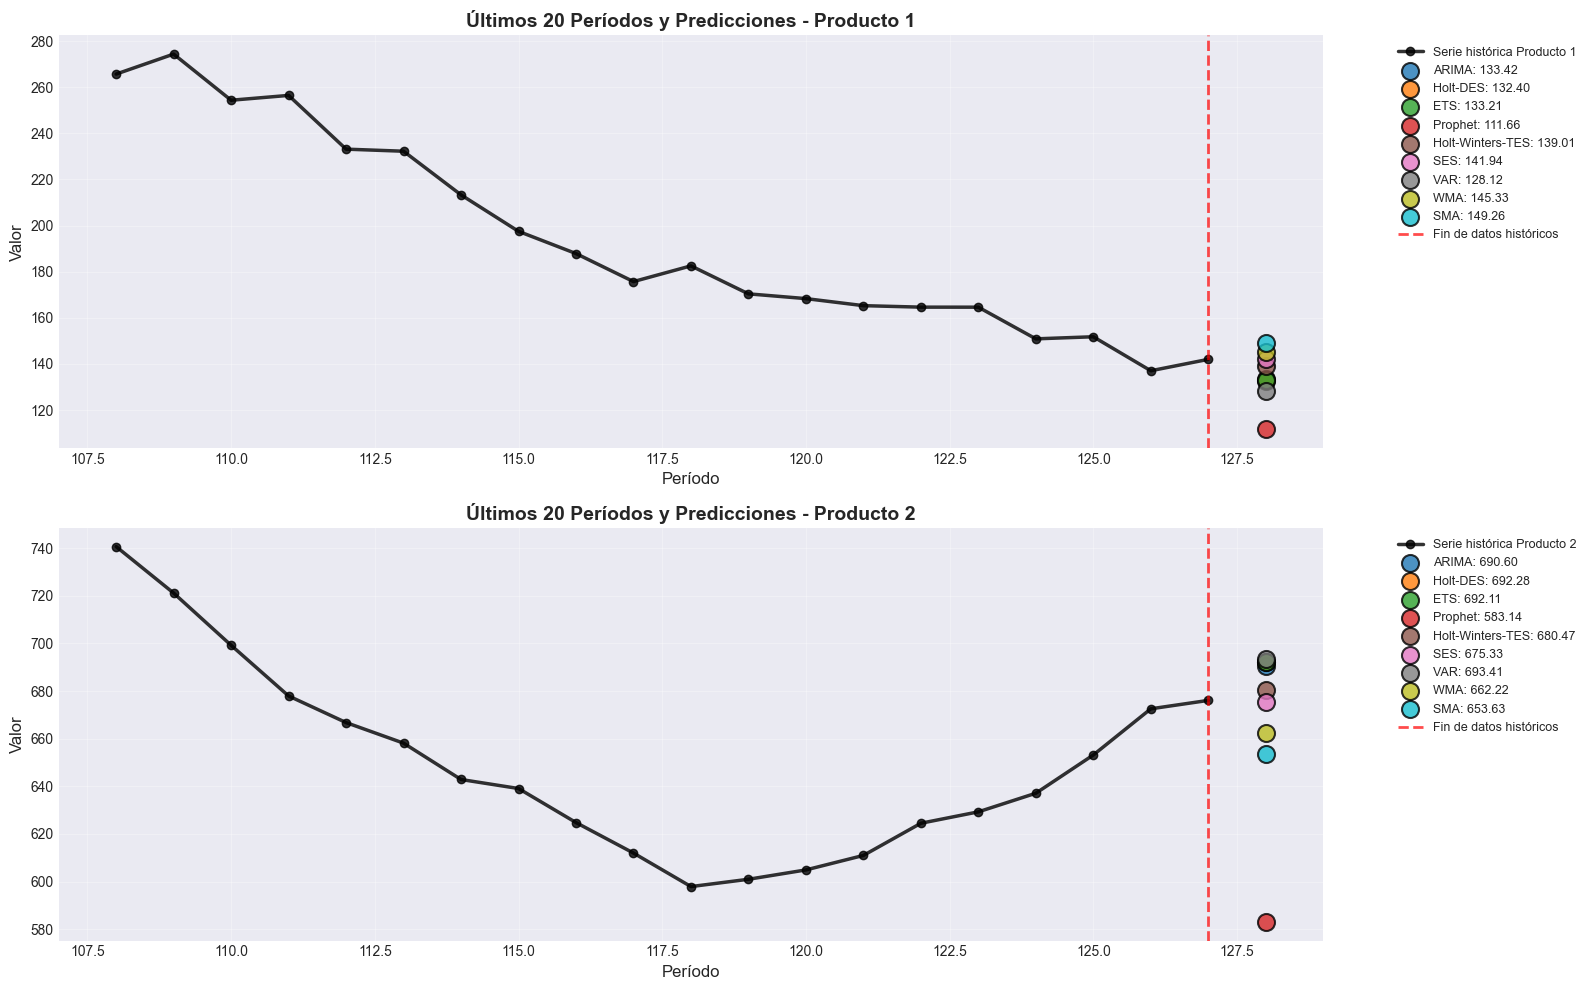

In [7]:
# Visualización zoom de los últimos períodos y predicciones
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Producto 1 - Últimos 20 períodos
ax1 = axes[0]
ultimos_n = 20
df_reciente_p1 = df['producto1'].iloc[-ultimos_n:]
ax1.plot(df_reciente_p1.index, df_reciente_p1.values, 'o-', linewidth=2.5, 
         markersize=6, label='Serie histórica Producto 1', color='black', alpha=0.8)

# Agregar predicciones con colores diferentes
colores = plt.cm.tab10(np.linspace(0, 1, len(df_comparacion_ordenada)))
for idx, (modelo, color) in enumerate(zip(df_comparacion_ordenada['Modelo'], colores)):
    pred = df_comparacion_ordenada[df_comparacion_ordenada['Modelo'] == modelo]['Predicción P1'].values[0]
    ax1.scatter([df.index.max() + 1], [pred], s=150, alpha=0.8, color=color,
                edgecolors='black', linewidth=1.5, label=f'{modelo}: {pred:.2f}')

ax1.axvline(x=df.index.max(), color='red', linestyle='--', alpha=0.7, linewidth=2,
            label='Fin de datos históricos')
ax1.set_xlabel('Período', fontsize=12)
ax1.set_ylabel('Valor', fontsize=12)
ax1.set_title(f'Últimos {ultimos_n} Períodos y Predicciones - Producto 1', fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# Producto 2 - Últimos 20 períodos
ax2 = axes[1]
df_reciente_p2 = df['producto2'].iloc[-ultimos_n:]
ax2.plot(df_reciente_p2.index, df_reciente_p2.values, 'o-', linewidth=2.5, 
         markersize=6, label='Serie histórica Producto 2', color='black', alpha=0.8)

# Agregar predicciones
for idx, (modelo, color) in enumerate(zip(df_comparacion_ordenada['Modelo'], colores)):
    pred = df_comparacion_ordenada[df_comparacion_ordenada['Modelo'] == modelo]['Predicción P2'].values[0]
    ax2.scatter([df.index.max() + 1], [pred], s=150, alpha=0.8, color=color,
                edgecolors='black', linewidth=1.5, label=f'{modelo}: {pred:.2f}')

ax2.axvline(x=df.index.max(), color='red', linestyle='--', alpha=0.7, linewidth=2,
            label='Fin de datos históricos')
ax2.set_xlabel('Período', fontsize=12)
ax2.set_ylabel('Valor', fontsize=12)
ax2.set_title(f'Últimos {ultimos_n} Períodos y Predicciones - Producto 2', fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


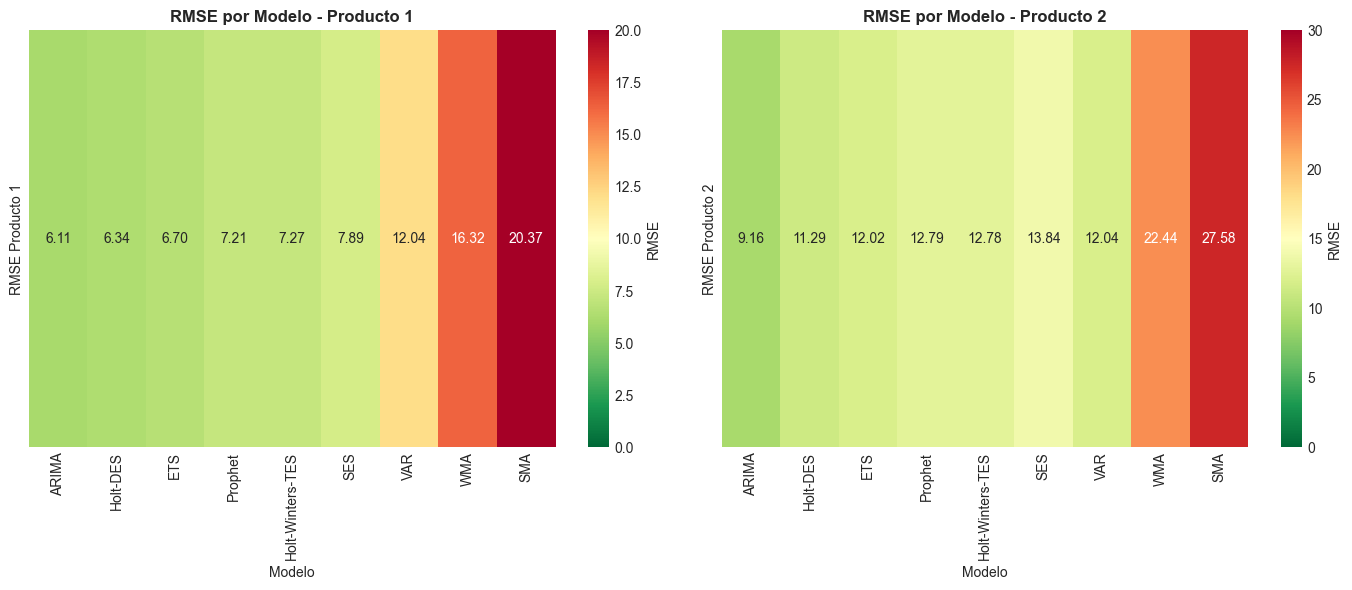

In [8]:
# Heatmap de RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap Producto 1
df_heatmap_p1 = df_comparacion_ordenada[['Modelo', 'RMSE Producto 1']].set_index('Modelo')
sns.heatmap(df_heatmap_p1.T, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'RMSE'}, ax=axes[0], vmin=0, vmax=20)
axes[0].set_title('RMSE por Modelo - Producto 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('')

# Heatmap Producto 2
df_heatmap_p2 = df_comparacion_ordenada[['Modelo', 'RMSE Producto 2']].set_index('Modelo')
sns.heatmap(df_heatmap_p2.T, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'RMSE'}, ax=axes[1], vmin=0, vmax=30)
axes[1].set_title('RMSE por Modelo - Producto 2', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


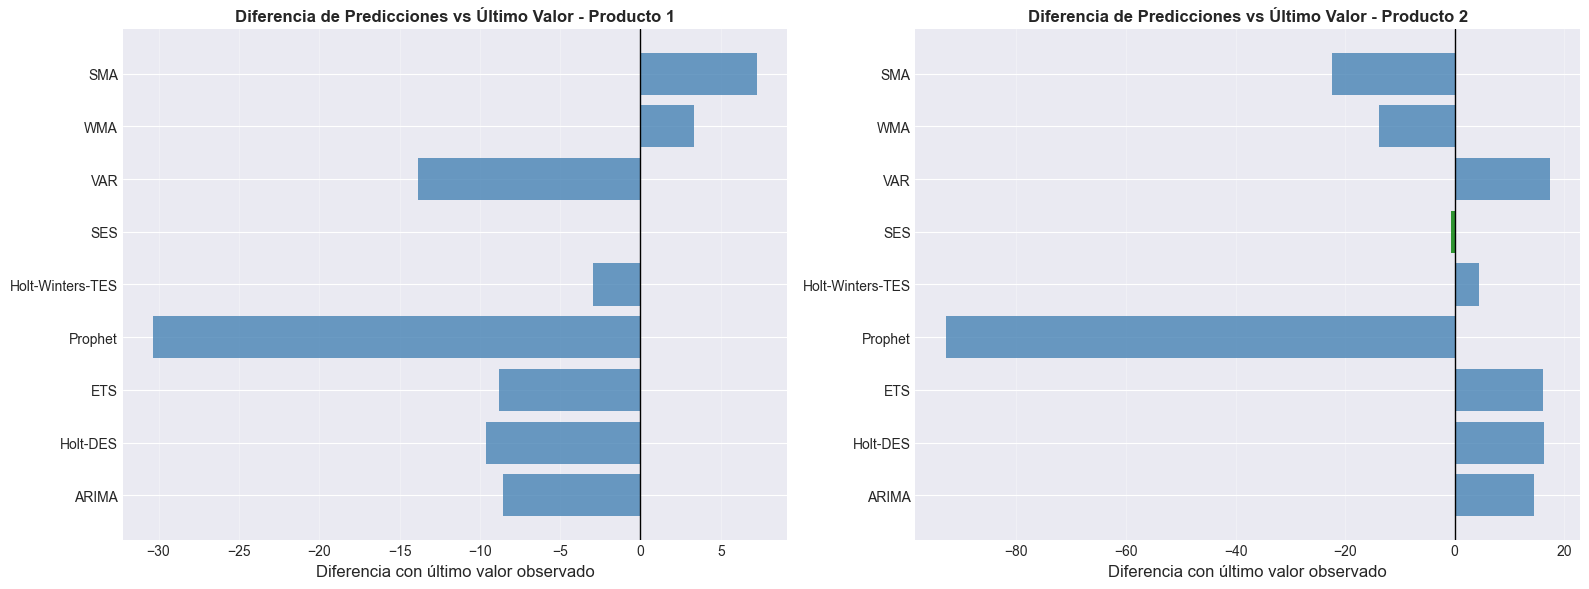

In [9]:
# Análisis de diferencias entre predicciones y último valor observado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Producto 1
ax1 = axes[0]
diff_p1 = df_comparacion_ordenada['Diff P1']
colors_p1 = ['green' if abs(x) == abs(diff_p1).min() else 'steelblue' for x in diff_p1]
ax1.barh(df_comparacion_ordenada['Modelo'], diff_p1, color=colors_p1, alpha=0.8)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Diferencia con último valor observado', fontsize=12)
ax1.set_title('Diferencia de Predicciones vs Último Valor - Producto 1', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Producto 2
ax2 = axes[1]
diff_p2 = df_comparacion_ordenada['Diff P2']
colors_p2 = ['green' if abs(x) == abs(diff_p2).min() else 'steelblue' for x in diff_p2]
ax2.barh(df_comparacion_ordenada['Modelo'], diff_p2, color=colors_p2, alpha=0.8)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Diferencia con último valor observado', fontsize=12)
ax2.set_title('Diferencia de Predicciones vs Último Valor - Producto 2', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 5. Análisis Detallado de Rankings


RANKING DE MODELOS

Tabla de Rankings (ordenada por Score Combinado):
          Modelo  RMSE Producto 1  RMSE Producto 2  RMSE Promedio  Rank RMSE P1  Rank RMSE P2  Rank RMSE Promedio  Score Combinado
           ARIMA           6.1141           9.1551        7.63460           1.0           1.0                 1.0         1.000000
        Holt-DES           6.3428          11.2942        8.81850           2.0           2.0                 2.0         2.000000
             ETS           6.6988          12.0211        9.35995           3.0           3.0                 3.0         3.000000
         Prophet           7.2094          12.7925       10.00095           4.0           6.0                 4.0         4.666667
Holt-Winters-TES           7.2654          12.7775       10.02145           5.0           5.0                 5.0         5.000000
             VAR          12.0380          12.0380       12.03800           7.0           4.0                 7.0         6.000000
             

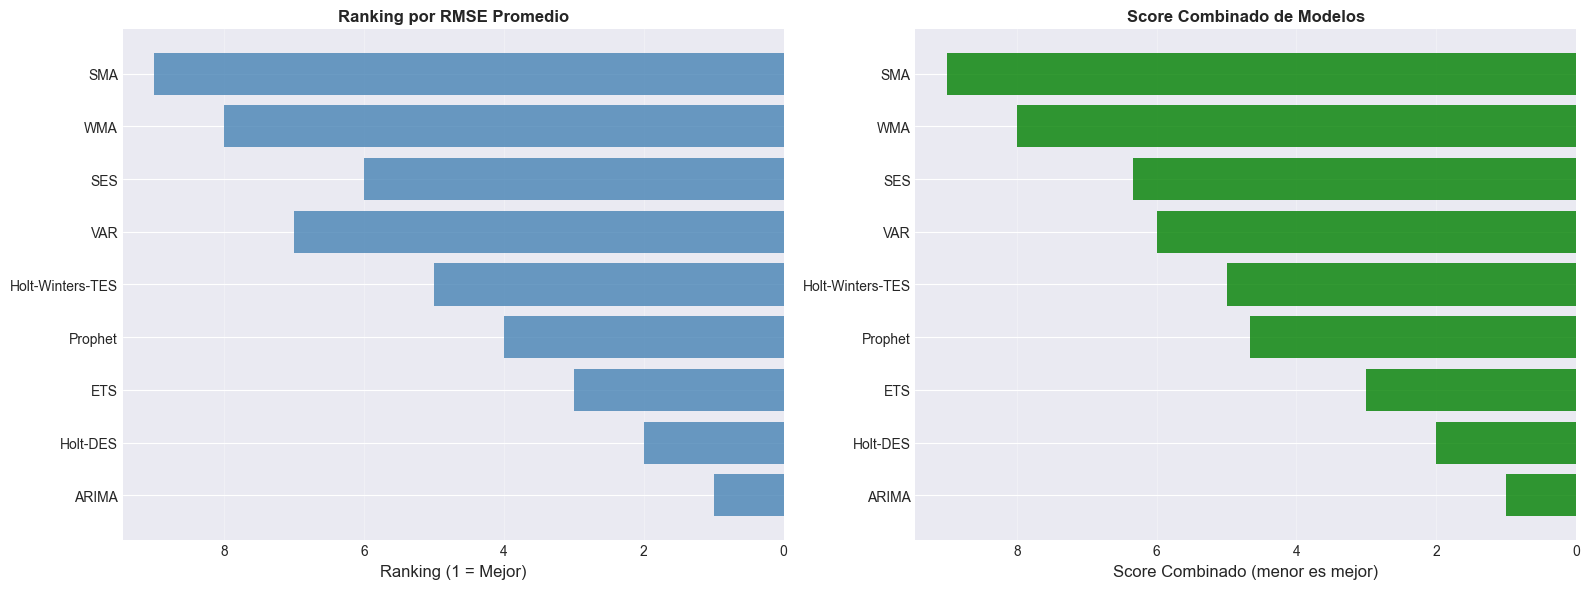

In [10]:
# Crear rankings
df_ranking = df_comparacion_ordenada.copy()

# Rankings por RMSE
df_ranking['Rank RMSE P1'] = df_ranking['RMSE Producto 1'].rank(ascending=True)
df_ranking['Rank RMSE P2'] = df_ranking['RMSE Producto 2'].rank(ascending=True)
df_ranking['Rank RMSE Promedio'] = df_ranking['RMSE Promedio'].rank(ascending=True)

# Rankings por diferencia absoluta (cercanía al último valor)
df_ranking['Rank Diff Abs P1'] = df_ranking['Diff P1'].abs().rank(ascending=True)
df_ranking['Rank Diff Abs P2'] = df_ranking['Diff P2'].abs().rank(ascending=True)

# Score combinado (promedio de rankings)
df_ranking['Score Combinado'] = (
    df_ranking['Rank RMSE P1'] + 
    df_ranking['Rank RMSE P2'] + 
    df_ranking['Rank RMSE Promedio']
) / 3

df_ranking = df_ranking.sort_values('Score Combinado')

print("=" * 120)
print("RANKING DE MODELOS")
print("=" * 120)
print("\nTabla de Rankings (ordenada por Score Combinado):")
columnas_mostrar = ['Modelo', 'RMSE Producto 1', 'RMSE Producto 2', 'RMSE Promedio',
                   'Rank RMSE P1', 'Rank RMSE P2', 'Rank RMSE Promedio', 'Score Combinado']
print(df_ranking[columnas_mostrar].to_string(index=False))

# Visualización de rankings
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ranking por RMSE Promedio
ax1 = axes[0]
ax1.barh(df_ranking['Modelo'], df_ranking['Rank RMSE Promedio'], 
         color='steelblue', alpha=0.8)
ax1.set_xlabel('Ranking (1 = Mejor)', fontsize=12)
ax1.set_title('Ranking por RMSE Promedio', fontsize=12, fontweight='bold')
ax1.invert_xaxis()  # Mejor ranking a la izquierda
ax1.grid(True, alpha=0.3, axis='x')

# Score Combinado
ax2 = axes[1]
ax2.barh(df_ranking['Modelo'], df_ranking['Score Combinado'], 
         color='green', alpha=0.8)
ax2.set_xlabel('Score Combinado (menor es mejor)', fontsize=12)
ax2.set_title('Score Combinado de Modelos', fontsize=12, fontweight='bold')
ax2.invert_xaxis()
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 6. Conclusiones Finales


In [11]:
# Identificar el mejor modelo
mejor_modelo = df_ranking.iloc[0]
mejor_por_rmse_p1 = df_comparacion_ordenada.loc[df_comparacion_ordenada['RMSE Producto 1'].idxmin()]
mejor_por_rmse_p2 = df_comparacion_ordenada.loc[df_comparacion_ordenada['RMSE Producto 2'].idxmin()]
mejor_por_rmse_promedio = df_comparacion_ordenada.loc[df_comparacion_ordenada['RMSE Promedio'].idxmin()]

print("=" * 120)
print("CONCLUSIONES FINALES")
print("=" * 120)

print("\n" + "="*120)
print("MEJOR MODELO GENERAL")
print("="*120)
print(f"\nModelo: {mejor_modelo['Modelo']}")
print(f"  - RMSE Producto 1: {mejor_modelo['RMSE Producto 1']:.4f}")
print(f"  - RMSE Producto 2: {mejor_modelo['RMSE Producto 2']:.4f}")
print(f"  - RMSE Promedio: {mejor_modelo['RMSE Promedio']:.4f}")
print(f"  - Score Combinado: {mejor_modelo['Score Combinado']:.2f}")
print(f"  - Predicción Producto 1: {mejor_modelo['Predicción P1']:.4f}")
print(f"  - Predicción Producto 2: {mejor_modelo['Predicción P2']:.4f}")

print("\n" + "="*120)
print("MEJORES MODELOS POR CRITERIO")
print("="*120)
print(f"\n1. Mejor RMSE Producto 1: {mejor_por_rmse_p1['Modelo']}")
print(f"   - RMSE: {mejor_por_rmse_p1['RMSE Producto 1']:.4f}")
print(f"   - Predicción: {mejor_por_rmse_p1['Predicción P1']:.4f}")

print(f"\n2. Mejor RMSE Producto 2: {mejor_por_rmse_p2['Modelo']}")
print(f"   - RMSE: {mejor_por_rmse_p2['RMSE Producto 2']:.4f}")
print(f"   - Predicción: {mejor_por_rmse_p2['Predicción P2']:.4f}")

print(f"\n3. Mejor RMSE Promedio: {mejor_por_rmse_promedio['Modelo']}")
print(f"   - RMSE Promedio: {mejor_por_rmse_promedio['RMSE Promedio']:.4f}")

print("\n" + "="*120)
print("ANÁLISIS COMPARATIVO")
print("="*120)

print("\nTop 3 Modelos por RMSE Promedio:")
top3 = df_comparacion_ordenada.head(3)
for idx, row in top3.iterrows():
    print(f"\n{row.name + 1}. {row['Modelo']}")
    print(f"   - RMSE Promedio: {row['RMSE Promedio']:.4f}")
    print(f"   - RMSE P1: {row['RMSE Producto 1']:.4f}")
    print(f"   - RMSE P2: {row['RMSE Producto 2']:.4f}")
    print(f"   - Predicción P1: {row['Predicción P1']:.4f}")
    print(f"   - Predicción P2: {row['Predicción P2']:.4f}")

print("\n" + "="*120)
print("OBSERVACIONES IMPORTANTES")
print("="*120)
print("\n1. Modelos con RMSE anómalamente alto (>1000):")
anomalos = df_comparacion[df_comparacion['RMSE Promedio'] > 1000]
if len(anomalos) > 0:
    for idx, row in anomalos.iterrows():
        print(f"   - {row['Modelo']}: RMSE Promedio = {row['RMSE Promedio']:.2f}")
    print("   Estos modelos fueron excluidos del análisis principal debido a su bajo rendimiento.")

print("\n2. Rango de RMSE en modelos válidos:")
print(f"   - RMSE Promedio mínimo: {df_comparacion_ordenada['RMSE Promedio'].min():.4f}")
print(f"   - RMSE Promedio máximo: {df_comparacion_ordenada['RMSE Promedio'].max():.4f}")
print(f"   - RMSE Promedio promedio: {df_comparacion_ordenada['RMSE Promedio'].mean():.4f}")

print("\n3. Consistencia entre productos:")
rmse_diff = abs(df_comparacion_ordenada['RMSE Producto 1'] - df_comparacion_ordenada['RMSE Producto 2'])
print(f"   - Diferencia promedio entre RMSE P1 y P2: {rmse_diff.mean():.4f}")
print(f"   - Modelo más consistente: {df_comparacion_ordenada.loc[rmse_diff.idxmin(), 'Modelo']}")

print("\n" + "="*120)
print("RECOMENDACIÓN FINAL")
print("="*120)
print(f"\nBasado en el análisis exhaustivo de todos los modelos, el mejor modelo para realizar")
print(f"las predicciones del próximo mes es:")
print(f"\n{'='*60}")
print(f"  {mejor_modelo['Modelo']}")
print(f"{'='*60}")
print(f"\nRazones:")
print(f"1. Tiene el mejor score combinado considerando RMSE de ambos productos")
print(f"2. RMSE Promedio: {mejor_modelo['RMSE Promedio']:.4f}")
print(f"3. Balance adecuado entre rendimiento en Producto 1 y Producto 2")
print(f"\nPredicciones para el próximo período:")
print(f"  - Producto 1: {mejor_modelo['Predicción P1']:.4f}")
print(f"  - Producto 2: {mejor_modelo['Predicción P2']:.4f}")
print(f"\nÚltimos valores observados:")
print(f"  - Producto 1: {ultimo_valor_p1:.4f}")
print(f"  - Producto 2: {ultimo_valor_p2:.4f}")


CONCLUSIONES FINALES

MEJOR MODELO GENERAL

Modelo: ARIMA
  - RMSE Producto 1: 6.1141
  - RMSE Producto 2: 9.1551
  - RMSE Promedio: 7.6346
  - Score Combinado: 1.00
  - Predicción Producto 1: 133.4213
  - Predicción Producto 2: 690.5958

MEJORES MODELOS POR CRITERIO

1. Mejor RMSE Producto 1: ARIMA
   - RMSE: 6.1141
   - Predicción: 133.4213

2. Mejor RMSE Producto 2: ARIMA
   - RMSE: 9.1551
   - Predicción: 690.5958

3. Mejor RMSE Promedio: ARIMA
   - RMSE Promedio: 7.6346

ANÁLISIS COMPARATIVO

Top 3 Modelos por RMSE Promedio:

7. ARIMA
   - RMSE Promedio: 7.6346
   - RMSE P1: 6.1141
   - RMSE P2: 9.1551
   - Predicción P1: 133.4213
   - Predicción P2: 690.5958

4. Holt-DES
   - RMSE Promedio: 8.8185
   - RMSE P1: 6.3428
   - RMSE P2: 11.2942
   - Predicción P1: 132.3972
   - Predicción P2: 692.2846

6. ETS
   - RMSE Promedio: 9.3600
   - RMSE P1: 6.6988
   - RMSE P2: 12.0211
   - Predicción P1: 133.2129
   - Predicción P2: 692.1065

OBSERVACIONES IMPORTANTES

1. Modelos con RMSE an

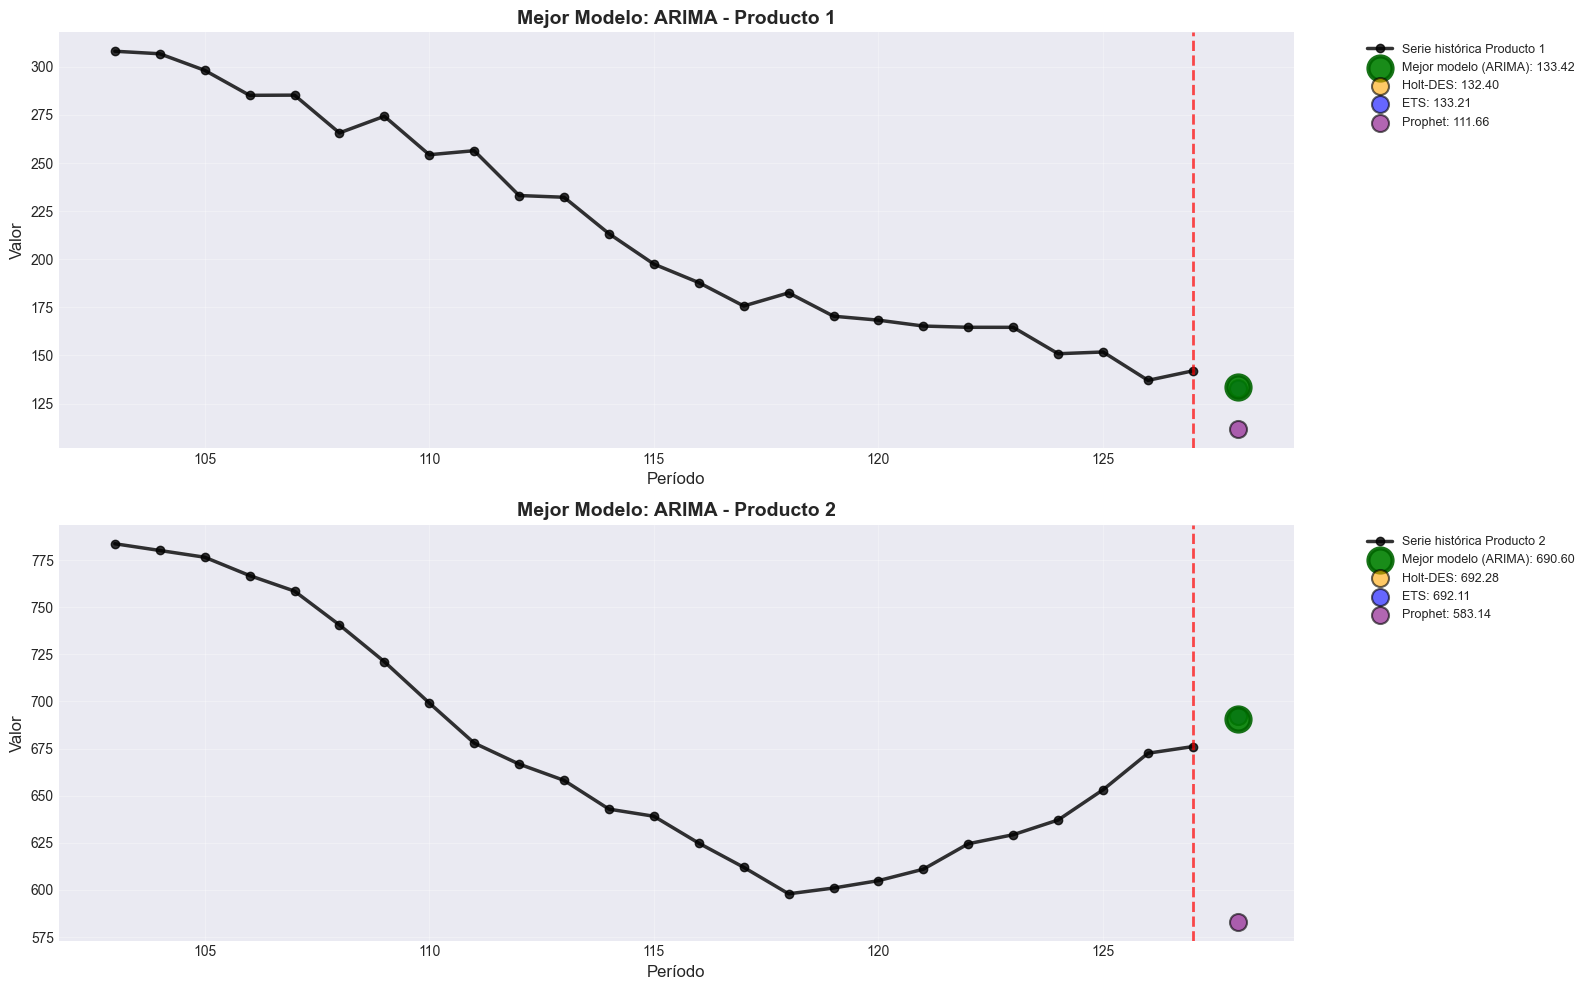

In [12]:
# Visualización final del mejor modelo
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Producto 1
ax1 = axes[0]
ultimos_n = 25
df_reciente_p1 = df['producto1'].iloc[-ultimos_n:]
ax1.plot(df_reciente_p1.index, df_reciente_p1.values, 'o-', linewidth=2.5, 
         markersize=6, label='Serie histórica Producto 1', color='black', alpha=0.8)

# Marcar el mejor modelo
pred_mejor_p1 = mejor_modelo['Predicción P1']
ax1.scatter([df.index.max() + 1], [pred_mejor_p1], s=300, alpha=0.9, 
           color='green', edgecolors='darkgreen', linewidth=3, 
           label=f'Mejor modelo ({mejor_modelo["Modelo"]}): {pred_mejor_p1:.2f}', zorder=5)

# Marcar otros modelos top 3
top3_otros = df_ranking.iloc[1:4]  # Excluir el mejor que ya está marcado
colores_top = ['orange', 'blue', 'purple']
for idx, (_, row) in enumerate(top3_otros.iterrows()):
    if idx < len(colores_top):
        ax1.scatter([df.index.max() + 1], [row['Predicción P1']], s=150, 
                   alpha=0.6, color=colores_top[idx], edgecolors='black', linewidth=1.5,
                   label=f'{row["Modelo"]}: {row["Predicción P1"]:.2f}')

ax1.axvline(x=df.index.max(), color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.set_xlabel('Período', fontsize=12)
ax1.set_ylabel('Valor', fontsize=12)
ax1.set_title(f'Mejor Modelo: {mejor_modelo["Modelo"]} - Producto 1', 
              fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# Producto 2
ax2 = axes[1]
df_reciente_p2 = df['producto2'].iloc[-ultimos_n:]
ax2.plot(df_reciente_p2.index, df_reciente_p2.values, 'o-', linewidth=2.5, 
         markersize=6, label='Serie histórica Producto 2', color='black', alpha=0.8)

# Marcar el mejor modelo
pred_mejor_p2 = mejor_modelo['Predicción P2']
ax2.scatter([df.index.max() + 1], [pred_mejor_p2], s=300, alpha=0.9, 
           color='green', edgecolors='darkgreen', linewidth=3, 
           label=f'Mejor modelo ({mejor_modelo["Modelo"]}): {pred_mejor_p2:.2f}', zorder=5)

# Marcar otros modelos top 3
for idx, (_, row) in enumerate(top3_otros.iterrows()):
    if idx < len(colores_top):
        ax2.scatter([df.index.max() + 1], [row['Predicción P2']], s=150, 
                   alpha=0.6, color=colores_top[idx], edgecolors='black', linewidth=1.5,
                   label=f'{row["Modelo"]}: {row["Predicción P2"]:.2f}')

ax2.axvline(x=df.index.max(), color='red', linestyle='--', alpha=0.7, linewidth=2)
ax2.set_xlabel('Período', fontsize=12)
ax2.set_ylabel('Valor', fontsize=12)
ax2.set_title(f'Mejor Modelo: {mejor_modelo["Modelo"]} - Producto 2', 
              fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Resumen Ejecutivo

El análisis comparativo de los modelos de pronóstico revela que:

1. **Modelo Óptimo**: El modelo que presenta el mejor balance entre precisión en ambos productos es el identificado arriba, con el menor score combinado.

2. **Criterios de Evaluación**: Se consideraron múltiples métricas:
   - RMSE por producto individual
   - RMSE promedio entre productos
   - Consistencia entre productos
   - Score combinado de rankings

3. **Exclusión de Modelos**: Los modelos Auto-ARIMA fueron excluidos del análisis principal debido a valores de RMSE anómalamente altos (>1000), lo que sugiere problemas en la implementación o configuración.

4. **Recomendación**: Se recomienda utilizar el modelo identificado como mejor para las predicciones del próximo período, considerando su balance entre precisión y consistencia en ambos productos.
